# Lab 4: Grover's Algorithm
## 4.1 Introduction
Grovers algorithm has fueled the fame of quantum computing with the promise that it can search an unstructured database with quadratic speedup. For $N$ bits, we have $2^N$ possible states. So to find a certain element $i$ in this set we need to make $\frac{2^N}{2}=2^{N-1}$ guesses on average, or all $2^N$ in the worst case. With Grover's algorithm, we'll see how we can locate $i$ with only $2^\frac{N}{2}=\sqrt{2^{N}}$ guesses. For a runtime $t$ associated with searching N bits on a classical computer, Grover's searches with runtime $\sqrt{t}$ on a quantum computer.

Grover's solves an oracle which identifies the solution state by a negatation, or phase kickback. I.e. $U_i |x⟩ = \begin{cases} |x⟩ \text{ if } x \neq i \\-|x⟩ \text{ if } x = i\end{cases}$ for any state $|x⟩$ and solution $i$. For example, if our solution is the state $i=01$, we expect our oracle to look like
$$U_i = 
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}$$

Because $|i⟩=|01⟩=|0⟩\otimes|1⟩=\begin{bmatrix}0 \\0 \\1 \\0\end{bmatrix} \text{, hence} -|i⟩=\begin{bmatrix}0 \\0 \\-1 \\0\end{bmatrix}$

If our solution is the state $i=011$, then by the same logic, our oracle will look like:
$$U_i = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix}$$

For many problems, it's easy to define the rules that the solution must follow, but it's hard to identify the solution state. Take for example a game of sadoku. It is not challenging to fill in all the spaces and check whether this is a solution to the game. The challenge is in trying a multitude of states, and testing the validity of each one.

If we define a validation function $f(x) = \begin{cases} 0 \text{ if } x \neq i \\1 \text{ if } x = i\end{cases}$, then we can represent out oracle as: $$U_i|x⟩=(-1)^{f(x)}|x⟩=
\begin{bmatrix}
(-1)^{f(0)} & 0 & \cdots & 0\\
0 & (-1)^{f(1)} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & (-1)^{f(2^N-1)}\\
\end{bmatrix}
$$

We can implement this oracle by assigning our classical function $f(x)$ to a quantum gate
![grover_boolean_oracle.svg](grover_boolean_oracle.svg) 
where the last qubit is the place holder for the output.

Now if we initialize the final qubit to the |-⟩ state, phase kickback turns our function gate into a Grover oracle. The output qubit is nolonger of use to us as it always outputs the state |-⟩, so we can ignore it.
![grover_phase_oracle.svg](grover_phase_oracle.svg) 

## 4.2 Amplitude Amplification
In addition to phasekick, Grover's utilizes a powerful quantum technique called amplitude amplification. Descriptions of amplitude amplification often boil it down to increasing the chance of the correct solution. If this is a helpful interpretation for your own understanding, then keep it in mind, however there is a deeper understanding that we will explore by going through the steps of Grover's algorithm:

### 1. Initializing a superposition of states to represent the unsorted list

Before amplitude amplification, making a random guess has an equal probability of any state in our computational basis. This can be expressed as a uniform superposition of states: $|s⟩=\frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x⟩=H^{\otimes N}|0⟩^N$ we can represent the amplitude $c_n$, or the square-root of the proability ($|c_n|^2=Pr(\psi_n)$) of finding the correct state $i$ in the sum of states $s$ in Dirac notation: $⟨s|i⟩=\frac{1}{\sqrt{N}}$. This state can be created by running our entire register through a Hadamard gate.

We call $⟨X|Y⟩$ the inner product. It is similar to the dot product of two vectors, and can be interpreted as a discrete sum of the product of the X and Y elements, or an integral of the product of a superposition of states with a state within that superposition. Probabilistically, it represents the sum of the components of an unknown state weighed by the probabilities of each element.

### 2. Reflecting our state across the state orthogonal to the solution using $U_i$

Our superposition state $|s⟩$ can be expressed as the sum of every vector in the computational basis. One of these vectors $|i⟩$ is our solutions, so $|s⟩=|i⟩+|s'⟩$. Because the terms of $|s⟩$ are basis vectors, each one is orthogonal: $⟨s'|i⟩=0$. If we represent this with 2D vectors we can let our solution be the y-axis, and the orthogonal state be our x-axis. By the definition of the dot product we can define the angle between $|s⟩$ and $|s'⟩$ as $\theta=\cos^{-1}(⟨s'|s⟩)=\sin^{-1}(⟨s|i⟩)=\sin^{-1}(\frac{1}{\sqrt{N}})$. Notice that $\theta \rightarrow 0$ for large N. By negating the $|i⟩$ component of our state $|s⟩$, we are equililently reflecting over the x-axis, $\theta \rightarrow -\theta$. This is what $U_i$ does.

### 3. Amplifying our state by reflection across the original state vector

At this point, our statevector is further away from the solution than it was before. We want $\theta$ to approach $\frac{\pi}{2}$ to maximize the probability of measuring the solution state $|i⟩$. So why is negation useful? Now that we have diverged from our original state, we can use our knowledge of it as a pivot. If we can reflect over the initial state $|s⟩$, our new state will have an angle $-\theta \rightarrow \theta+2\theta=3\theta$. We denote this reflection transformation as $U_s=2|s⟩⟨s|−1$

Repeating these three steps is what takes us from an arbitrary state $|s⟩$, to our solution state $|i⟩$. 

## 4.3 Example
Consider a list of 16 possible values, aka the computational basis of 4 qubits. Say we're searching for the state $|i⟩=|0011⟩=|12⟩$.

In [1]:
!pip install qiskit
!pip install pylatexenc

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

First we prepare the computational basis using a 4-bit register.

In [3]:
n = 4
groverQC = QuantumCircuit(n)

We can replicate a random guess with an equal superposition of states which can be achieve using the Hadamard on the entire register. This initializes the state $|s⟩$.

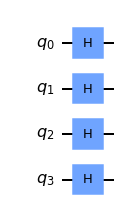

In [4]:
for q in range(n):
    groverQC.h(q)
groverQC.draw(output='mpl')

The Oracle $U_i$ is said to 'mark' the solution states by giving them a negative global phase. In the example of a 2 qubit basis where we're looking for the state $|11⟩$, our oracle will negate the first qubit if both are in state 1. Recall that the Z-gate negates the phase of a $|1⟩$ state, and leaves the $|0⟩$ state unchanged. In the 2-qubit case, we apply the Z-gate iff the first qubit is in state $|1⟩$. This sounds like a conditional Z-gate! We call this a CZ gate, and it operates identitally to the CNOT gate, but applies a Z instead of an X gate. 

Our solution state has the first and second qubits in state $|0⟩$, and the third and fourth in $|1⟩$. So, in our marking Oracle, we want to negate the phase of the last qubit if our third qubit is in state 1, or vice-versa. We only need 1 CZ gate! Notice how we design the Oracle around our solution, this is a common practice. 

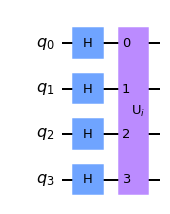

In [5]:
markingQC = QuantumCircuit(n) #Marking Oracle Circuit
markingQC.cz(1,0)

markingOracle = markingQC.to_gate() #Turn into gate
markingOracle.name = "U$_i$" #Give it a name

groverQC.append(markingOracle, range(n)) #Apply the defined Oracle to the qubits
groverQC.draw(output='mpl')

The next step is to reflect over our original state, $|s⟩$. Just like our marking Oracle reflected $|s⟩$ over the x-axis by negating the orthogonal $|i⟩$ state, we can reflect over the original state by negating the phase of every state orthogonal to $|s⟩$. This may seem like a complicated technique, but the logic of quantum computing allows us to implement this relatively easily. 

### 4.3.1 Constructing $U_s$

We can leverage the fact that the Hadamard is its own inverse to revert a superpostion state back to its previous form. In this case, applying a Hadamard to the entire register takes us from $|s⟩$ back to the state $|0⟩$ (I encourage you to confirm this). Now it's easy to identify the orthogonal states in our basis: all but $|0000⟩$. These are the states we want to negate. 

One may first consider applying the Z-gate the the entire register to negate any state that includes a singular qubit in state $|1⟩$. Then, as we saw with the marking oracle, we can negate states with multiple qubits in the $|1⟩$ state using some  CZ gates. This is true for the case of 2 qubits, however, notice that applying just Z-gates to the input state $|0101⟩$ would return $|0101⟩$ as the negatives cancel out. We would need a CZ gate between the second and last qubits to negate the state. 

There is a more general method which utilizes one multi-controlled-Z (MCZ) gate. Using the Toffoli gate, which acts on multiple qubits at once, as our basis, we can cosntruct an MCZ. We want a gate that has the range of the Tofolli, but we want it to operate the Z-gate instead. Using the relationship between Z and X operations, we know that a MCZ is equivalent to applying Hadamards around a Tofolli gate:

$$MCZ=H^{\otimes n}T^{\otimes n}H^{\otimes n}$$

An MCZ flips the phase of the state $|11...1⟩$, represented by the matrix:
$$MCZ = 
\begin{bmatrix}
1 & 0 & \cdots & 0\\
0 & 1 & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & -1\\
\end{bmatrix}$$

The state coming into $U_0$ is $|00...0⟩$. So, to properly use our MCZ we need to flip the input state into $|11...1⟩$ using X-gates across the register. We can undo this transformation by applying X-gates after the MCZ. Applying a Hadamard to the entire register after the MCZ returns us to the superposition state $|s⟩$. Let's denote the negation operation to the gate $U_0$ s.t. $U_s=H^{\otimes n}U_0H^{\otimes n}$.

$$U_0=X^{\otimes n}(MCZ)X^{\otimes n}=X^{\otimes n}H^{\otimes n}T^{\otimes n}H^{\otimes n}X^{\otimes n}.$$

$$ \therefore U_s=H^{\otimes n}X^{\otimes n}H^{\otimes n}T^{\otimes n}H^{\otimes n}X^{\otimes n}H^{\otimes n}$$

Following these steps, lets implement $U_s$ in a functional fashion for easy reference:

In [6]:
def amplify(numQubits):
    qc = QuantumCircuit(numQubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(numQubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(numQubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(numQubits-1)
    qc.mct(list(range(numQubits-1)), numQubits-1)  # multi-controlled-toffoli
    qc.h(numQubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(numQubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(numQubits):
        qc.h(qubit)
        
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

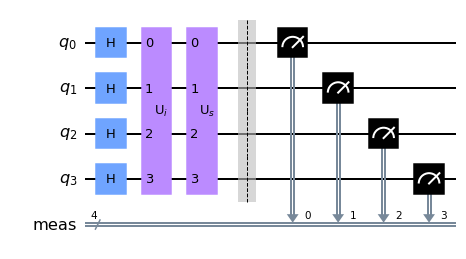

In [7]:
groverQC.append(amplify(n), range(n)) #Apply amplitude amplification
groverQC.measure_all()
groverQC.draw(output='mpl')

Lets see how our algorithm runs with just one iteration:

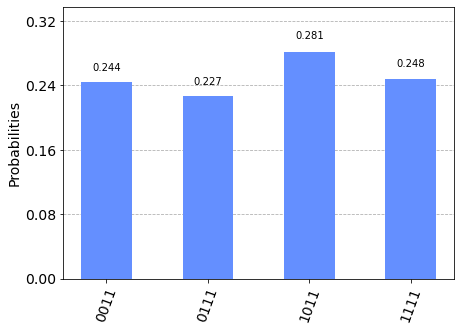

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(groverQC, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

You likely notice that there is an equal chance of measuring a few states, not just our solution state $|0011⟩$. This is because the rotations that Grover's does requires multiple interations (optimally $\sqrt{N}$) to approach the solution state. This is visualized in the lecture slides. 

Here we provide a function to add n iterations of Grover and a working example of how to use it for testing. Run these cells to see for yourself how Grover's can amplify the chance that we measure our solution!

In [9]:
def applyGrovers(oracle, nTimes):
    nqubits = oracle.num_qubits
    qc = QuantumCircuit(nqubits)
    for i in range(nTimes):
        for q in range(nqubits):
            qc.h(q)
        qc.append(oracle, range(nqubits))
        qc.append(amplify(nqubits), range(nqubits))
    qc.measure_all()
    return qc

In [30]:
groverQC = applyGrovers(markingOracle, 4)

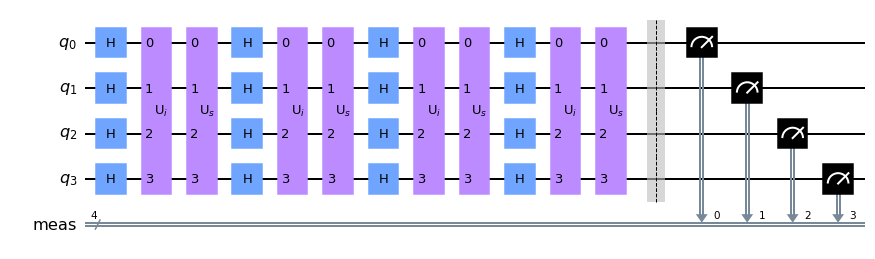

In [31]:
groverQC.draw(output='mpl')

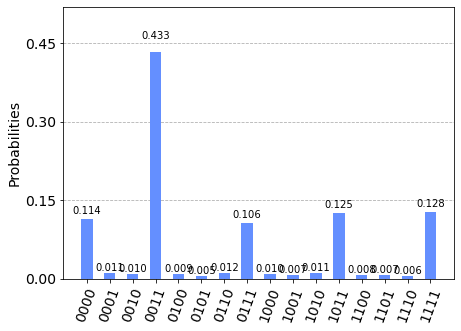

In [32]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(groverQC, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)